<a href="https://colab.research.google.com/github/jakarthaa/Deep-learning/blob/keras/01_predecir_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Proyecto 1  

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)
float32
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5373 - accuracy: 0.6136
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0185 - accuracy: 0.7591
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8636 - accuracy: 0.7758
Epoch 4/5
1875/1

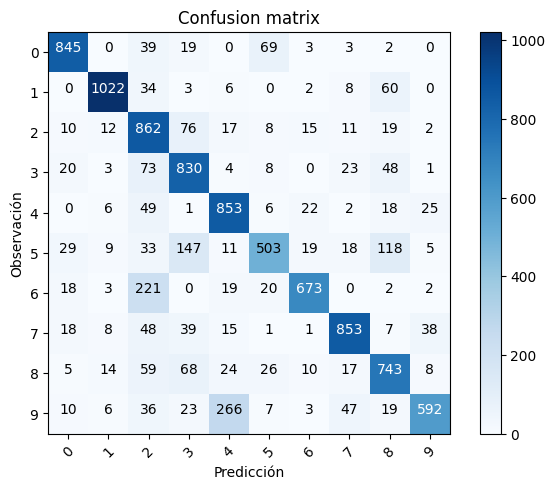

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  Dense
from tensorflow.keras import Sequential

#importacion de modelo mnist
mnist = tf.keras.datasets.mnist

(x_train , y_train),(x_test, y_test) = mnist.load_data()

#plt.imshow(x_train[0], cmap=plt.cm.binary)

#preordenamiento
x_train= x_train.astype("float32")
x_test = x_test.astype("float32")
x_train=x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
print(x_train.shape)
print(x_test.shape)
print(x_test.dtype)
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
#definicion de modelo
model = Sequential()
model.add(Dense(10,activation="sigmoid",input_shape=(784,)))
model.add(Dense(10,activation="softmax"))
model.summary()
#configuracion de modelo
model.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)
#entrenamiento de modelo
model.fit(x_train,y_train,epochs=5)
#evaluacio de modelo
test_loss, test_acc = model.evaluate(x_test,y_test)
print(test_acc)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')
    from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

313/313 [==============================] - 2s 5ms/step
[0.00961542 0.04543514 0.02782497 0.02857145 0.0417187  0.02335121
 0.7203704  0.00252665 0.07958572 0.02100029]


0.99999994

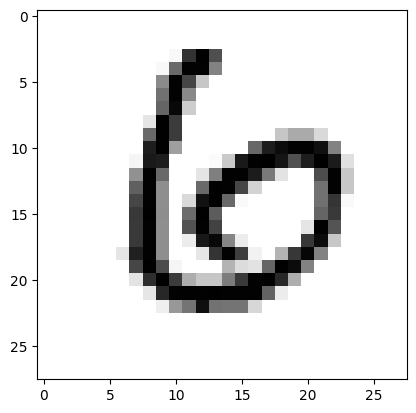

In [ ]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)
predicion = model.predict(x_test)
np.argmax(predicion[11])
print(predicion[11])
np.sum(predicion[11])